In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.63 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [ ]:
df["Embarked"] =df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Age           0
Embarked      0
Cabin       687
dtype: int64


In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
import  seaborn as sns

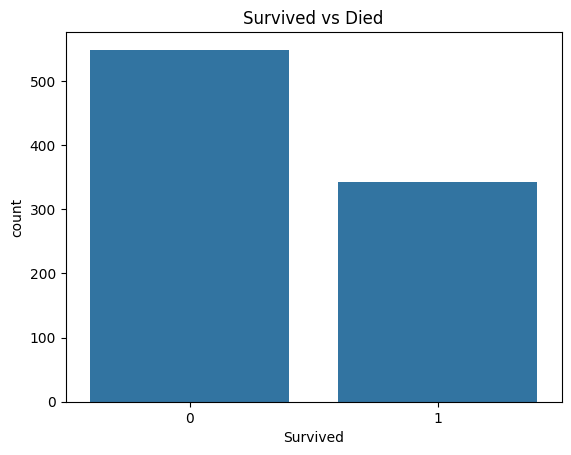

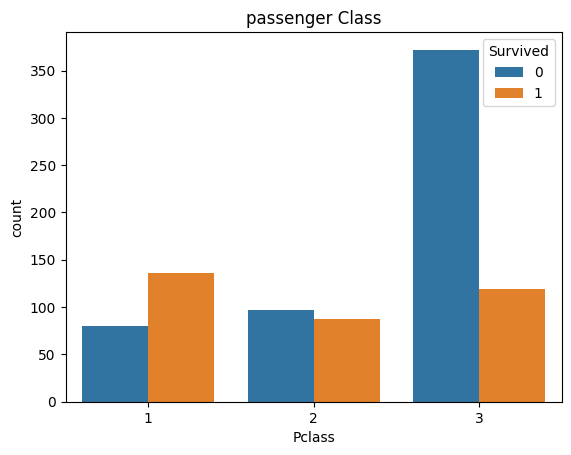

In [ ]:
sns.countplot(x="Survived",data =df).set_title('Survived vs Died')
plt.show()
sns.countplot(x="Pclass",hue="Survived" ,data =df).set_title('passenger Class')
plt.show()

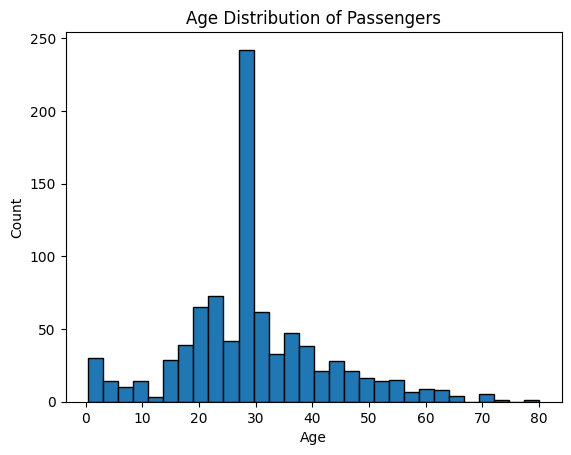

In [ ]:
plt.hist(df["Age"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()

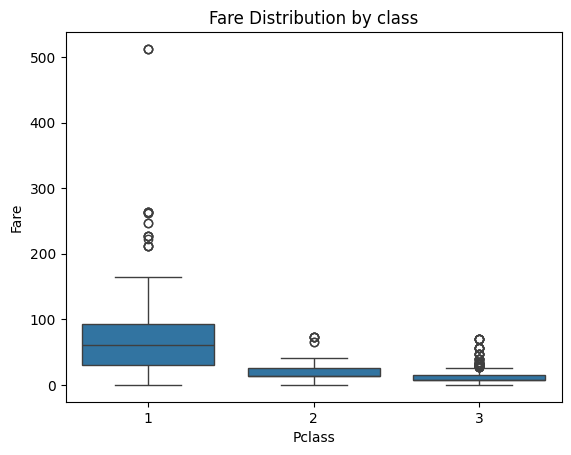

In [ ]:
sns.boxplot(x="Pclass", y="Fare",data=df)
plt.title("Fare Distribution by class")
plt.show()

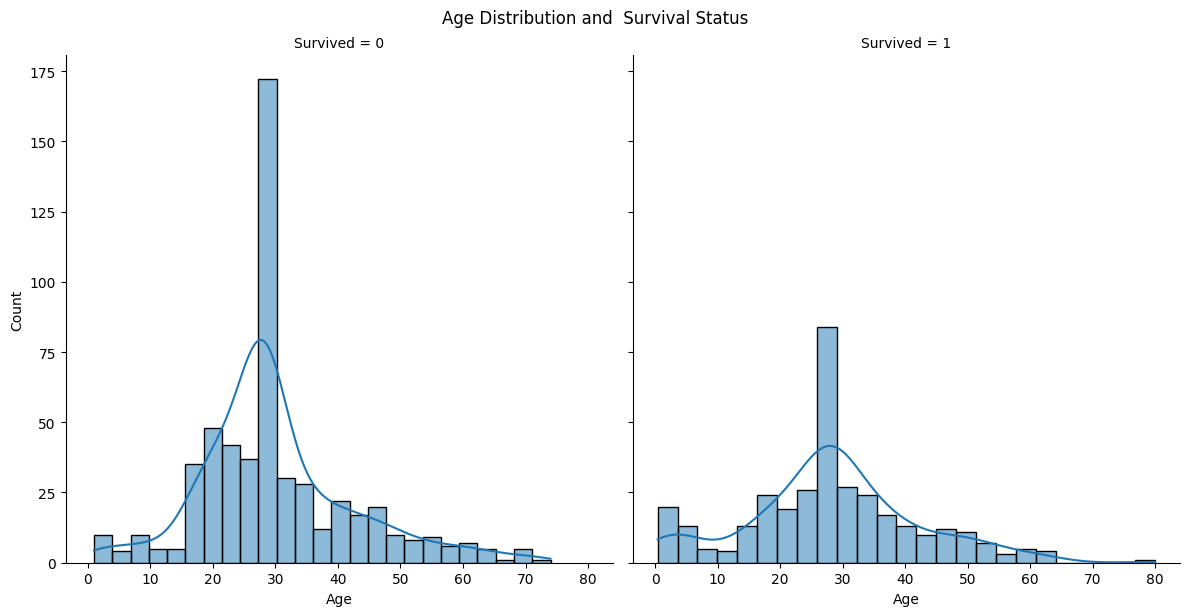

In [ ]:
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution and  Survival Status', y=1.02)
plt.show()

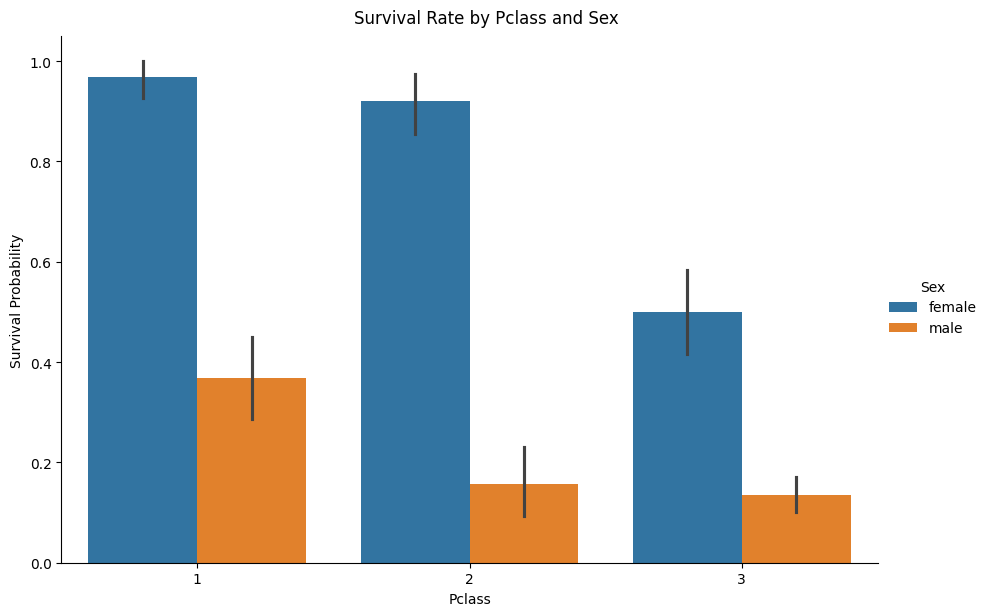

In [ ]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
g.fig.suptitle('Survival Rate by Pclass and Sex', y=1.02) # Use fig.suptitle to set the title
plt.ylabel('Survival Probability')
plt.show()

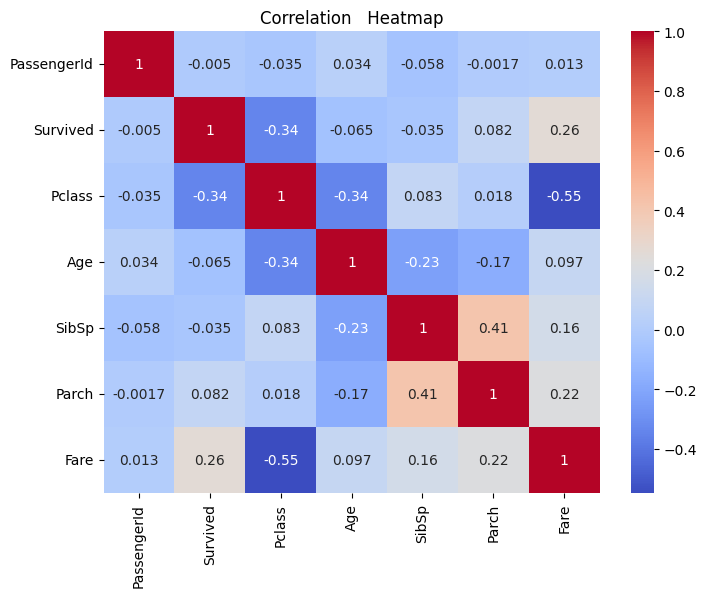

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation   Heatmap")
plt.show()

In [ ]:
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
samp_df = pd.DataFrame(sample_data)
print("Sample DataFrame:")
display(samp_df)

Sample DataFrame:


,col1,col2,col3
0,1,A,True
1,2,B,False
2,3,C,True
3,4,D,False


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(samp_df, title="Titanic Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 106.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Titanic dataset.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]